In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from torchvision.utils import make_grid       # for data checking
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.datasets import ImageFolder  # for working with classes and images

import random
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


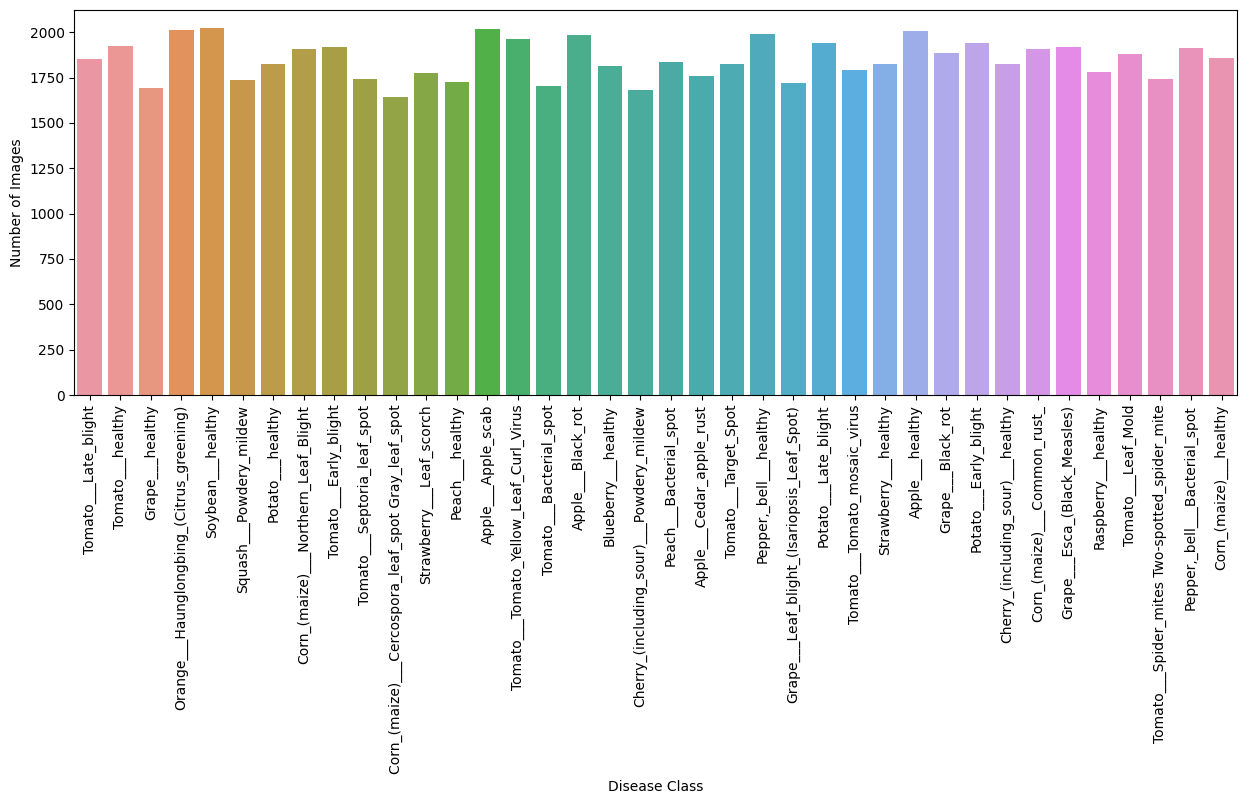

In [4]:
train_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
# show all diseases in dataset
diseases = os.listdir(train_dir)
# show number of each class
dic = {}
for Class in diseases:
    dic[Class] = len(os.listdir(train_dir + '/' + Class))

df = pd.DataFrame(list(dic.items()), columns=["Disease Class", "Number of Images"])

# df = df.sort_values(by="Number of Images", ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(data=df ,x='Disease Class' ,y= 'Number of Images' )
plt.xticks(rotation=90)
plt.show()

In [5]:
# identify uniqe plant in dataset
plants = []
NumberOfDiseases = 0
for plant in diseases:
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
print(f'number of different plants is :{len(plants)}')
print(plants)

number of different plants is :14
['Tomato', 'Grape', 'Orange', 'Soybean', 'Squash', 'Potato', 'Corn_(maize)', 'Strawberry', 'Peach', 'Apple', 'Blueberry', 'Cherry_(including_sour)', 'Pepper,_bell', 'Raspberry']


# Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

# Building Covoution Layer

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dropout(0.4))

In [16]:
# Output layer
model.add(Dense(units=38,activation='softmax'))

# Compiling Model

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │    24,577,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,806,794 (98.45 MB)

 Trainable params: 25,806,794 (98.45 MB)

 Non-trainable params: 0 (0.00 B)

# Model Traininng

In [19]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


I0000 00:00:1732475237.955870     105 service.cc:145] XLA service 0x7efe340128b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732475237.955948     105 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   5/2197 ━━━━━━━━━━━━━━━━━━━━ 56s 26ms/step - accuracy: 0.0182 - loss: 10.6818      

I0000 00:00:1732475245.625368     105 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_2', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads

I0000 00:00:1732475245.633370     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5193 - loss: 1.8117

I0000 00:00:1732475320.508652     104 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_3', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_2', 4 bytes spill stores, 12 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 12 bytes spill loads



2197/2197 ━━━━━━━━━━━━━━━━━━━━ 103s 42ms/step - accuracy: 0.5193 - loss: 1.8113 - val_accuracy: 0.8824 - val_loss: 0.3683
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - accuracy: 0.8914 - loss: 0.3378 - val_accuracy: 0.9274 - val_loss: 0.2234
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - accuracy: 0.9374 - loss: 0.1888 - val_accuracy: 0.9418 - val_loss: 0.1785
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 60s 27ms/step - accuracy: 0.9602 - loss: 0.1204 - val_accuracy: 0.9624 - val_loss: 0.1190
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 61s 28ms/step - accuracy: 0.9716 - loss: 0.0847 - val_accuracy: 0.9615 - val_loss: 0.1221
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 60s 28ms/step - accuracy: 0.9765 - loss: 0.0700 - val_accuracy: 0.9579 - val_loss: 0.1406
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 61s 28ms/step - accuracy: 0.9814 - loss: 0.0551 - val_accuracy: 0.9651 - val_loss: 0.1152
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 61s 28ms/step - accuracy: 0.9834 - loss: 0.0

# Model Evaluation

In [20]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - accuracy: 0.9952 - loss: 0.0148
Training accuracy: 0.9958176016807556


In [21]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9655 - loss: 0.1333
Validation accuracy: 0.9671636819839478


## Saving Model

In [22]:
model.save('/kaggle/working/trained_model.keras')

In [23]:
training_history.history #Return Dictionary of history

{'accuracy': [0.7042321562767029,
  0.907461404800415,
  0.9437940120697021,
  0.9632406234741211,
  0.9721601605415344,
  0.9777651429176331,
  0.982032835483551,
  0.9846076965332031,
  0.9864428639411926,
  0.9882068634033203],
 'loss': [1.0172984600067139,
  0.2865796983242035,
  0.1683318316936493,
  0.11229734867811203,
  0.08227992802858353,
  0.06665094196796417,
  0.054166700690984726,
  0.04889335110783577,
  0.0415615513920784,
  0.03608161583542824],
 'val_accuracy': [0.8823696970939636,
  0.9274413585662842,
  0.9418392777442932,
  0.9623833298683167,
  0.9615297317504883,
  0.9579444527626038,
  0.9650580286979675,
  0.954245388507843,
  0.9647734761238098,
  0.9671636819839478],
 'val_loss': [0.36831966042518616,
  0.2233995944261551,
  0.17849469184875488,
  0.11900340020656586,
  0.12205318361520767,
  0.14055955410003662,
  0.11517782509326935,
  0.15098120272159576,
  0.12023425847291946,
  0.12468840181827545]}

In [24]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [25]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

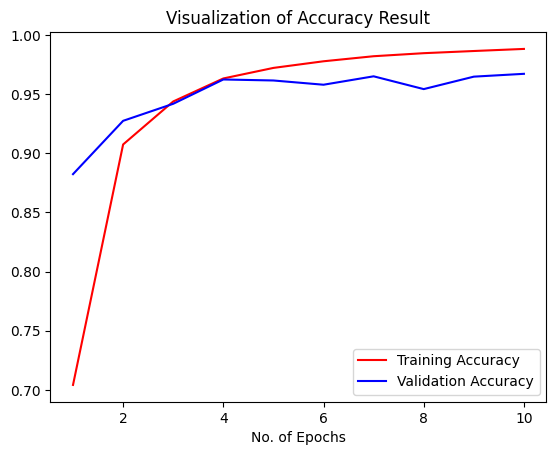

In [26]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [27]:
def plot_learning_curves(training_history):
    plt.figure(figsize=(12, 4))

    # accuracy curve
    plt.subplot(1, 2, 1)
    plt.plot(training_history.history['accuracy'], label='Training Accuracy')
    plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # loss curve
    plt.subplot(1, 2, 2)
    plt.plot(training_history.history['loss'], label='Training Loss')
    plt.plot(training_history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

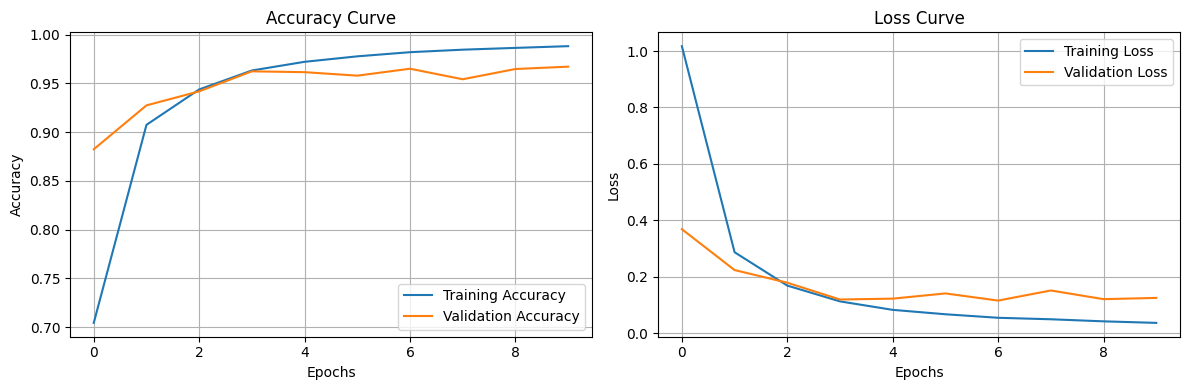

In [28]:
# show learning curves
plot_learning_curves(training_history)

## other metrics for model evaluation

In [29]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step


In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [34]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.89      0.94       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.94      0.99      0.96       440
                                   Apple___healthy       0.90      0.98      0.94       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.93      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.95      0.

## Confusion Matrix Visualization

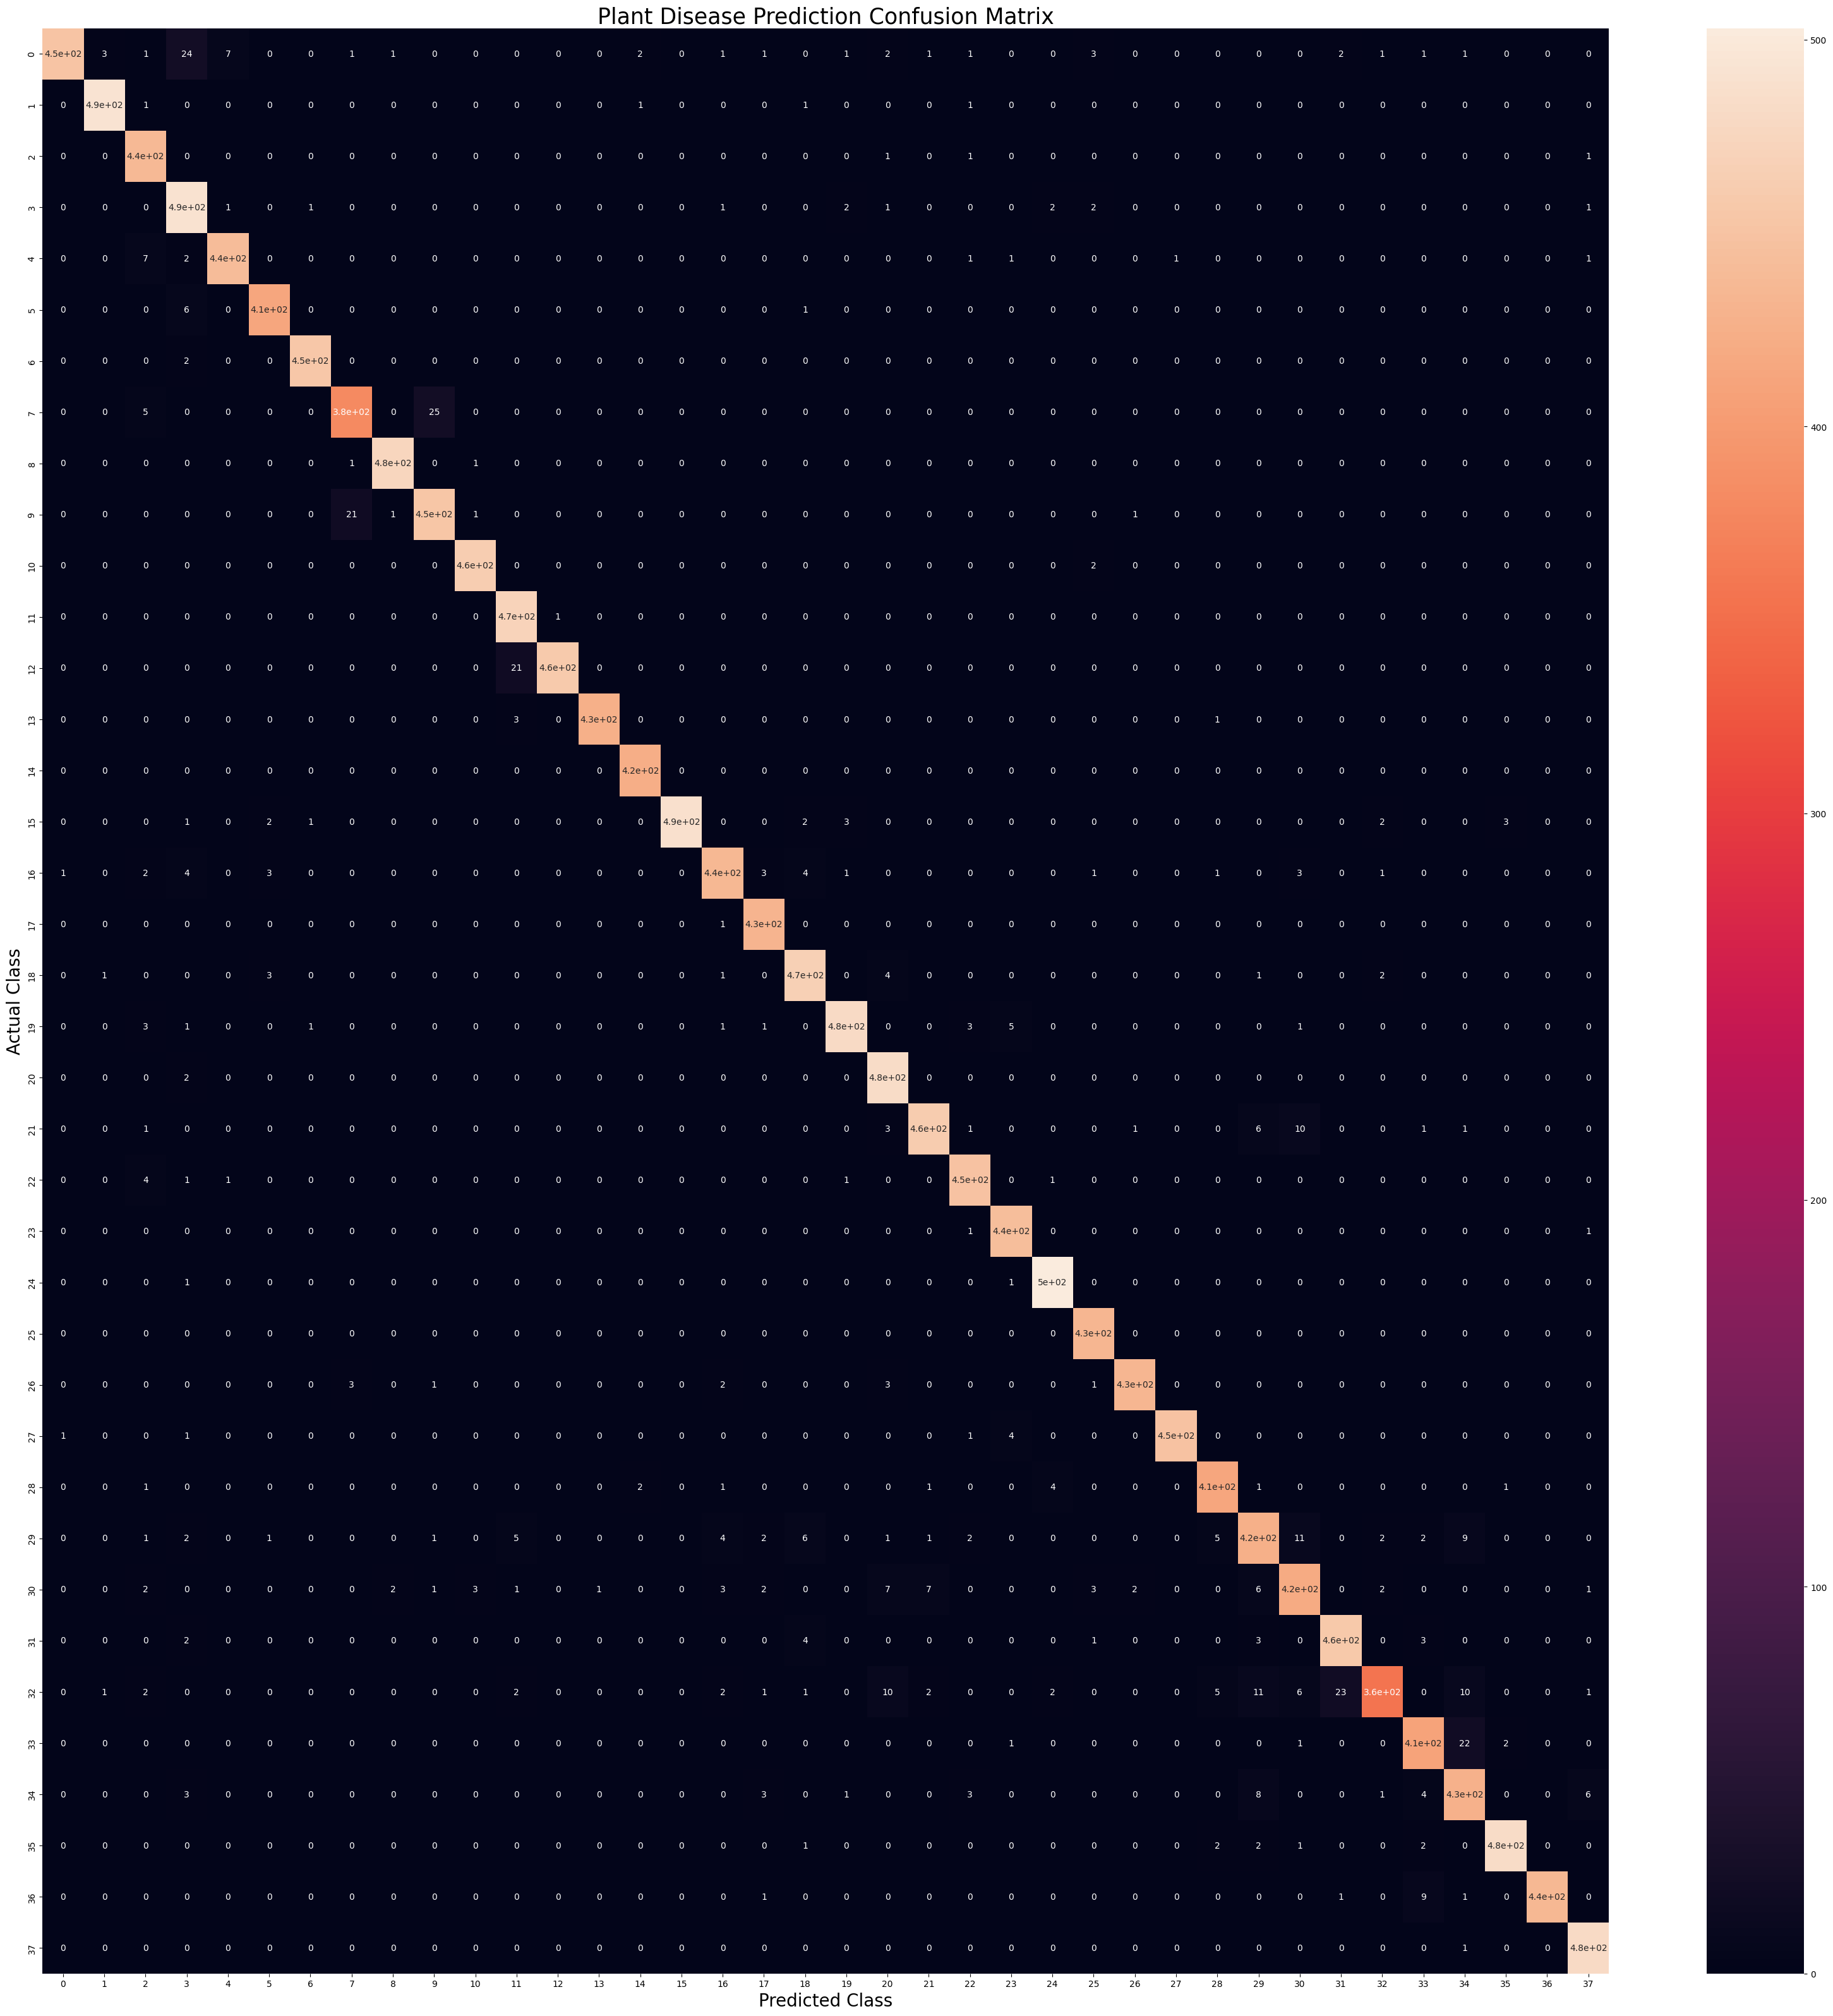

In [37]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

## Chargement du modèle

In [3]:
model = tf.keras.models.load_model('/kaggle/working/trained_model.keras')

In [39]:
!pip install opencv-python

In [ ]:
#Test Image Visualization
import cv2
image_path = '/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [41]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


In [42]:
print(predictions)

[[1.51560961e-14 6.81768680e-17 1.00000000e+00 1.59445002e-17
  2.69868492e-13 3.30297388e-17 3.59240275e-20 6.11846681e-19
  3.70953747e-19 6.45149583e-21 1.82503816e-22 5.72475984e-15
  7.66787246e-18 5.39955975e-15 3.07985977e-18 4.00003236e-16
  4.13134052e-15 1.75263094e-17 1.50109188e-15 3.47778514e-14
  3.82487415e-16 7.31360920e-18 5.58412770e-16 5.66953403e-16
  1.07660676e-23 6.37455501e-22 1.79849579e-18 1.68005732e-14
  2.25983520e-16 1.15317830e-13 2.93370580e-13 3.10495246e-17
  6.45429365e-16 1.47308873e-19 8.84633011e-14 1.65924924e-18
  2.55034781e-15 5.12804080e-15]]


In [43]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


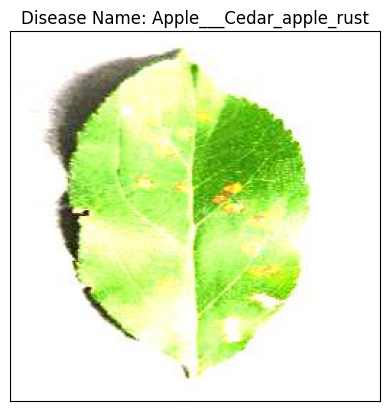

In [44]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()